<a href="https://colab.research.google.com/github/atik666/attentionModel/blob/cloab/UNetSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#!pip install segmentation-models
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from skimage.io import imread, imshow
import cv2

In [4]:
data = np.load("/content/drive/MyDrive/Colab/encoder/cwtX.npy")
label = np.load("/content/drive/MyDrive/Colab/encoder/X.npy")
y = np.load("/content/drive/MyDrive/Colab/encoder/y.npy")

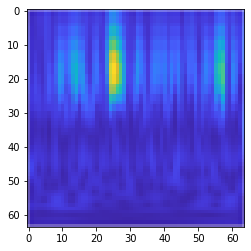

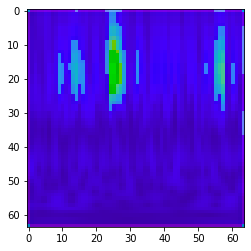

In [5]:
image_x = random.randint(0, len(data))

img = cv2.cvtColor(data[image_x], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

lbl = cv2.cvtColor(label[image_x], cv2.COLOR_BGR2RGB)
plt.imshow(lbl)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, _, _ = train_test_split(data, y, test_size = 0.25, random_state = 0, shuffle=False)
y_train, y_test, _, _ = train_test_split(label, y, test_size = 0.25, random_state = 0, shuffle=False)

In [7]:
#Build the model
inputs = tf.keras.layers.Input((64, 64, 3))

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(3, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [8]:
results = model.fit(x_train, y_train, validation_split=0.33, batch_size=16, epochs=50)

Epoch 1/50
63/63 [==============================] - 38s 72ms/step - loss: 0.4500 - accuracy: 0.9282 - val_loss: 0.3841 - val_accuracy: 0.9918
Epoch 2/50
63/63 [==============================] - 3s 54ms/step - loss: 0.3697 - accuracy: 0.9874 - val_loss: 0.3743 - val_accuracy: 0.9958
Epoch 3/50
63/63 [==============================] - 3s 51ms/step - loss: 0.3608 - accuracy: 0.9899 - val_loss: 0.3715 - val_accuracy: 0.9970
Epoch 4/50
63/63 [==============================] - 3s 54ms/step - loss: 0.3572 - accuracy: 0.9909 - val_loss: 0.3699 - val_accuracy: 0.9975
Epoch 5/50
63/63 [==============================] - 3s 54ms/step - loss: 0.3550 - accuracy: 0.9914 - val_loss: 0.3693 - val_accuracy: 0.9976
Epoch 6/50
63/63 [==============================] - 3s 51ms/step - loss: 0.3538 - accuracy: 0.9919 - val_loss: 0.3690 - val_accuracy: 0.9977
Epoch 7/50
63/63 [==============================] - 3s 54ms/step - loss: 0.3530 - accuracy: 0.9922 - val_loss: 0.3687 - val_accuracy: 0.9976
Epoch 8/50
6

In [9]:
preds_test = model.predict(x_test, verbose=1)

16/16 [==============================] - 1s 41ms/step


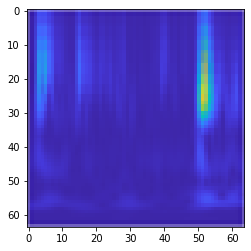

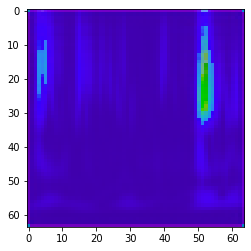

In [10]:
image_x = random.randint(0, len(preds_test))

img1 = cv2.cvtColor(x_test[image_x], cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

img2 = cv2.cvtColor(preds_test[image_x], cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [11]:
np.save('/content/drive/MyDrive/Colab/encoder/load/test_seg.npy', preds_test)

In [12]:
print(preds_test.shape)

(500, 64, 64, 3)


In [12]:
## on different loads
x_test1 = np.load("/content/drive/MyDrive/Colab/encoder/load/1X_test.npy")
x_test1.shape

(500, 64, 64, 3)

In [10]:
resized = []
for i in range(len(x_test1)):
  x = cv2.resize(x_test1[i], dsize=(64, 64), interpolation=cv2. INTER_CUBIC)
  resized.append(x)
x_testF = np.asarray(resized)

In [14]:
preds_test1 = model.predict(x_test1, verbose=1)
print(preds_test1.shape)

16/16 [==============================] - 0s 24ms/step
(500, 64, 64, 3)


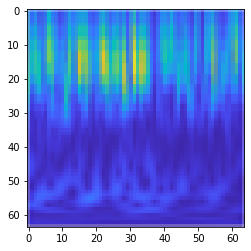

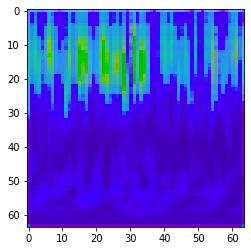

In [20]:
image_x = random.randint(0, len(preds_test1))

img1 = cv2.cvtColor(x_test1[image_x], cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

img2 = cv2.cvtColor(preds_test1[image_x], cv2.COLOR_BGR2RGB)
plt.imshow((img2))
plt.show()



In [21]:
np.save('/content/drive/MyDrive/Colab/encoder/load/1x_test_seg.npy', preds_test1)